<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/salamhha/handson-ml3/blob/main/practice/Chapter09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

In [14]:
# K-means
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

k = 5
X, y = make_blobs(n_samples=1500, n_features=2,
                  centers=k, random_state=42)
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

In [3]:
y_pred

array([4, 0, 2, ..., 4, 0, 1], dtype=int32)

In [4]:
kmeans.cluster_centers_

array([[ 2.07564643,  4.16862733],
       [-6.85406294, -6.7780619 ],
       [-8.90992726,  7.38564553],
       [-2.51326868,  8.99855257],
       [ 4.7933247 ,  1.99328561]])

In [5]:
import numpy as np
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([0, 4, 0, 0], dtype=int32)

In [6]:
kmeans.transform(X_new).round(2)

array([[ 3.  , 11.14, 10.41,  7.44,  4.79],
       [ 2.36, 13.2 , 13.07,  8.91,  1.79],
       [ 5.21, 10.51,  7.36,  6.02,  7.86],
       [ 5.34, 10.05,  7.67,  6.52,  7.81]])

In [12]:
# Color segmentation
import PIL
import urllib.request

homl3_root = "https://github.com/ageron/handson-ml3/raw/main/"
filename = "ladybug.png"
filepath = filename

url = f"{homl3_root}/images/unsupervised_learning/{filename}"
urllib.request.urlretrieve(url, filepath)

image = np.asarray(PIL.Image.open(filepath))
image.shape

(533, 800, 3)

In [26]:
X = image.reshape(-1,3)
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)

In [27]:
segmented_img = kmeans.cluster_centers_[kmeans.labels_]

In [28]:
segmented_img.shape

(426400, 3)

In [29]:
segmented_img = segmented_img.reshape(image.shape)

In [30]:
segmented_img.shape

(533, 800, 3)

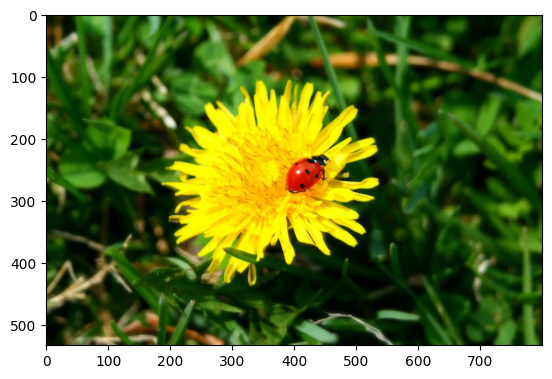

In [31]:
import matplotlib.pyplot as plt
plt.imshow(image)

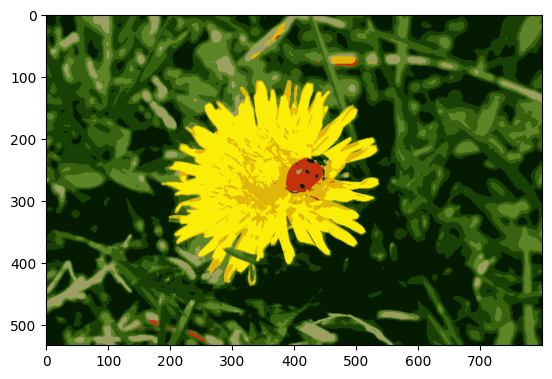

In [33]:
plt.imshow(segmented_img / 255)

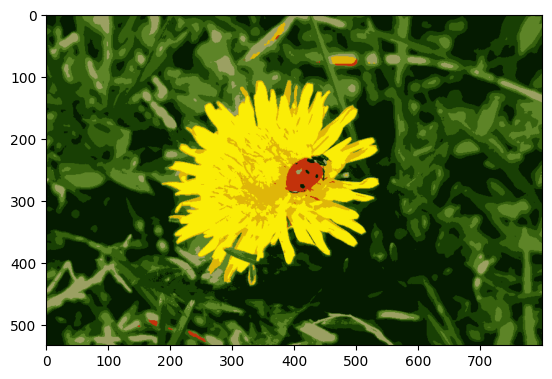

In [34]:
plt.imshow(segmented_img.astype('uint8'))

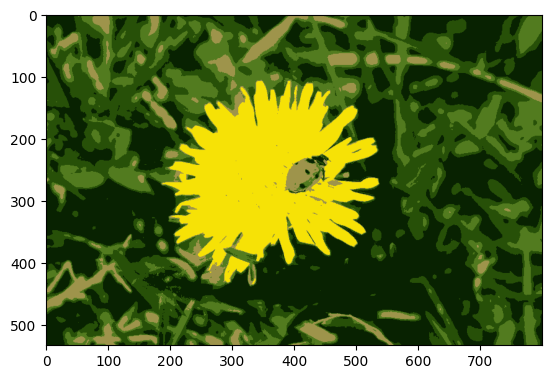

In [35]:
kmeans = KMeans(n_clusters=5, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)
plt.imshow(segmented_img / 255)

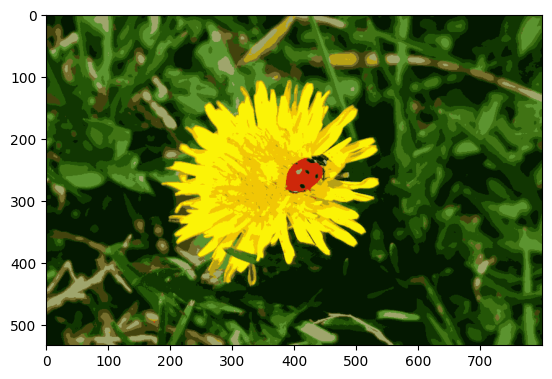

In [36]:
kmeans = KMeans(n_clusters=12, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)
plt.imshow(segmented_img / 255)

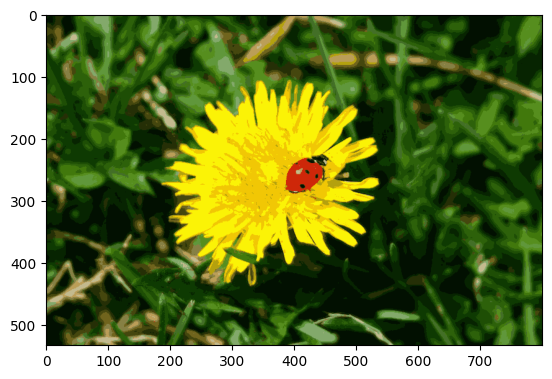

In [37]:
kmeans = KMeans(n_clusters=20, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)
plt.imshow(segmented_img / 255)

In [66]:
# Clustering for semi-supervised learning
from sklearn.datasets import load_digits
X_digits, y_digits = load_digits(return_X_y=True)
X_train, y_train = X_digits[:1400], y_digits[:1400]
X_test, y_test = X_digits[1400:], y_digits[1400:]

In [67]:
from sklearn.linear_model import LogisticRegression
n_labeled = 50
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

LogisticRegression(max_iter=10000)

In [68]:
log_reg.score(X_test, y_test)

0.7581863979848866

In [69]:
# Using k-means to extract representative digits
k = 50
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

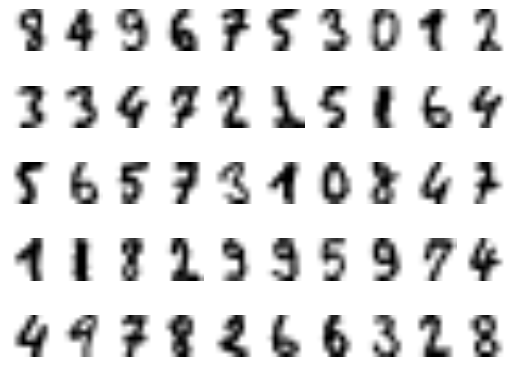

In [70]:
plt.figure()
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8,8), cmap="binary",
               interpolation="bilinear")
    plt.axis("off")

plt.show()

In [71]:
y_representative_digits = np.array([8,4,9,6,7,5,3,0,1,2,3,3,4,7,2,1,5,1,6,4,5,6,5,7,3,1,0,8,4,7,1,1,8,2,9,9,5,9,7,4,4,9,7,8,2,6,6,3,2,8])

In [72]:
log_reg = LogisticRegression(max_iter = 10_000)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.8387909319899244

In [73]:
# label propagation
y_train_propagated = np.empty(len(X_train), dtype=np.int64)
for i in range(k):
  y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

In [74]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.8589420654911839

In [81]:
# removing outliers
percentile_closest = 99
X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
  in_cluster = (kmeans.labels_ == i)
  cluster_dist = X_cluster_dist[in_cluster]
  cutoff_distance = np.percentile(cluster_dist, percentile_closest)
  above_cutoff = (X_cluster_dist > cutoff_distance)
  X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [82]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.8564231738035264

In [83]:
(y_train_partially_propagated == y_train[partially_propagated]).mean()

np.float64(0.9548148148148148)

In [98]:
# DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [100]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [101]:
X, y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.2)

In [102]:
np.unique(dbscan.labels_)

array([0, 1])

In [103]:
# predicting new instances
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [104]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([0, 1, 0, 1])

In [105]:
knn.predict_proba(X_new)

array([[0.88, 0.12],
       [0.  , 1.  ],
       [0.8 , 0.2 ],
       [0.  , 1.  ]])

In [107]:
# using maximum distance to classify anomalies
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  1,  0, -1])

In [112]:
# Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
X = np.array([0, 2, 5, 8.5]).reshape(-1, 1)
agg = AgglomerativeClustering(linkage="complete").fit(X)
def learned_parameters(estimator):
    return [attrib for attrib in dir(estimator)
            if attrib.endswith("_") and not attrib.startswith("_")]
learned_parameters(agg)

['children_',
 'labels_',
 'n_clusters_',
 'n_connected_components_',
 'n_features_in_',
 'n_leaves_']

In [113]:
agg.children_

array([[0, 1],
       [2, 3],
       [4, 5]])

In [114]:
# Guassian Mixture

X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [115]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

In [116]:
gm.weights_

array([0.3902064 , 0.20970929, 0.40008431])

In [117]:
gm.means_

array([[ 0.0512132 ,  0.07512971],
       [ 3.39854326,  1.05926051],
       [-1.4076241 ,  1.42704927]])

In [118]:
gm.covariances_

array([[[ 0.68780591,  0.79597839],
        [ 0.79597839,  1.21232694]],

       [[ 1.14901133, -0.03241901],
        [-0.03241901,  0.95484861]],

       [[ 0.63480459,  0.72971575],
        [ 0.72971575,  1.16110086]]])